# Text Mine COVID Literaturet

## Import Libraries & Data

In [1]:
#Install Libraries

#!pip install numpy
#!pip install pandas
#!pip install sklearn
#!pip install scipy
#!pip install langdetect

In [2]:
#Import Libraries

import csv
import random
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch

%matplotlib inline
import seaborn as sns

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords 
from gensim.parsing.preprocessing import remove_stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer  
import re

from wordcloud import WordCloud

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score


# from sklearn.metrics import confusion_matrix, classification_report, , roc_curve, auc
  
 # from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn import svm
# from sklearn.svm import LinearSVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier 
# from sklearn.neural_network import MLPClassifier


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# For google colab user
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# df_path = "/content/drive/MyDrive/Colab Notebooks/2020 WINTER/metadata.csv"
# df = pd.read_csv(df_path)

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df = pd.read_csv('metadata.csv')
df.info(verbose=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497906 entries, 0 to 497905
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          497906 non-null  object 
 1   sha               172105 non-null  object 
 2   source_x          497906 non-null  object 
 3   title             497674 non-null  object 
 4   doi               281753 non-null  object 
 5   pmcid             182522 non-null  object 
 6   pubmed_id         241936 non-null  object 
 7   license           497906 non-null  object 
 8   abstract          363064 non-null  object 
 9   publish_time      497687 non-null  object 
 10  authors           484020 non-null  object 
 11  journal           464755 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  197568 non-null  object 
 14  arxiv_id          6687 non-null    object 
 15  pdf_json_files    172105 non-null  object 
 16  pmc_json_files    13

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


# 1. Data Cleaning – [1 mark] 
Cleans the data by removing duplicate papers, making the text contents easier to mine by adjusting formatting, and extracting useful fields from the larger dataset such as authors, abstracts, date of publication and more. You may choose to use this starter code and clean data that it produces, or if your chosen algorithm requires a different format of data or approach, you are free to modify and/or write you own data

In [5]:
# load the meta data from the CSV file and extract out fields that will be useful to our application

df_raw = df[['title','abstract','authors','publish_time']]
df_raw = df_raw.drop_duplicates(subset='abstract', keep="first")
df_raw =df_raw.dropna()
df_raw["abstract"] = df_raw["abstract"].str.lower()
df_raw.head()

,title,abstract,authors,publish_time
0,Clinical features of culture-proven Mycoplasma...,objective: this retrospective chart review des...,"Madani, Tariq A; Al-Ghamdi, Aisha A",2001-07-04
1,Nitric oxide: a pro-inflammatory mediator in l...,inflammatory diseases of the respiratory tract...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",2000-08-15
2,Surfactant protein-D and pulmonary host defense,surfactant protein-d (sp-d) participates in th...,"Crouch, Erika C",2000-08-25
3,Role of endothelin-1 in lung disease,endothelin-1 (et-1) is a 21 amino acid peptide...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",2001-02-22
4,Gene expression in epithelial cells in respons...,respiratory syncytial virus (rsv) and pneumoni...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",2001-05-11


In [6]:
stop_word = stopwords.words('english')
 
def clean_text (text):
     
    # remove stop words
    new_text = remove_stopwords(text)

    tokenizer = RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(new_text)
    words_list = [word for word in words if not word in stop_word and len(word)>1 ]
    new_text = ' '.join(words_list)  

    new_text = " ".join(new_text.split())     # remove leading & trailing space, elimiated spaces to single space 
    # new_text = re.sub(r' \d+', ' ', new_text) # remove numbers after space

    return new_text

def lemmatizer(text):

    tokenizer = RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(text) 

    # Lemmatize a word into dictionary format
    wnl = WordNetLemmatizer()
    lemmatized_sentence = ' '.join([wnl.lemmatize(token) for token in words]) 

    return lemmatized_sentence

In [7]:
# clean the abstract (including remove stop word, lematization)

df_raw['abstract'] = df_raw['abstract'].apply(clean_text)
df_raw['abstract'] = df_raw['abstract'].apply(lemmatizer)

df_raw.head()

,title,abstract,authors,publish_time
0,Clinical features of culture-proven Mycoplasma...,objective retrospective chart review describes...,"Madani, Tariq A; Al-Ghamdi, Aisha A",2001-07-04
1,Nitric oxide: a pro-inflammatory mediator in l...,inflammatory disease respiratory tract commonl...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",2000-08-15
2,Surfactant protein-D and pulmonary host defense,surfactant protein sp participates innate resp...,"Crouch, Erika C",2000-08-25
3,Role of endothelin-1 in lung disease,endothelin et 21 amino acid peptide diverse bi...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",2001-02-22
4,Gene expression in epithelial cells in respons...,respiratory syncytial virus rsv pneumonia viru...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",2001-05-11


In [8]:
# Keep the year of the publish time

df_raw['publish_year'] = pd.DatetimeIndex(df_raw.publish_time).year
df_raw.drop(['publish_time'], axis = 1, inplace = True)

df_raw.head()

,title,abstract,authors,publish_year
0,Clinical features of culture-proven Mycoplasma...,objective retrospective chart review describes...,"Madani, Tariq A; Al-Ghamdi, Aisha A",2001
1,Nitric oxide: a pro-inflammatory mediator in l...,inflammatory disease respiratory tract commonl...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",2000
2,Surfactant protein-D and pulmonary host defense,surfactant protein sp participates innate resp...,"Crouch, Erika C",2000
3,Role of endothelin-1 in lung disease,endothelin et 21 amino acid peptide diverse bi...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",2001
4,Gene expression in epithelial cells in respons...,respiratory syncytial virus rsv pneumonia viru...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",2001


# 2. Data Visualization and Exploratory Data Analysis 
Depending on your overarching theme and questions that you wish to address about COVID-19 present 3 graphical figures that visualize aspects or information in the data that you will further explore with your models. How could these trends be used to help with the task of methodically extracting all information and trends of this type? Consider how accessing the data and creating these visualizations will inform how the data will need to be pre-processed and fed into your models. All graphs should be readable and presented in the notebook. All axes must be appropriately labeled. In addition to data visualizations, perform exploratory data analysis in other forms, if necessary.

In [9]:
def count_words(word_list):

    word_count = dict((word,0) for word in word_list)
    
    for word in word_count:
        for abstract in df_raw['abstract']:
            if str(word) in abstract:
                word_count[word] += 1
 
    return (word_count)

Ingredients for all three COVID-19 vaccines currently on the market in the United States.  


|COVID-19 Vaccine|Ingredients|
|-|-|
|Moderna|messenger ribonucleic acid (mRNA)|
| |lipids (SM-102, polyethylene glycol [PEG] 2000 dimyristoyl glycerol [DMG], cholesterol, and 1,2-distearoyl-sn-glycero-3-phosphocholine [DSPC])|
| |tromethamine, tromethamine hydrochloride, acetic acid, sodium acetate trihydrate, sucrose|
|Pfizer-BioNTech| mRNA| 
| |lipids ((4-hydroxybutyl)azanediyl)bis(hexane-6,1-diyl)bis(2-hexyldecanoate), 2[(polyethylene glycol)-2000]-N,N-ditetradecylacetamide, 1 2-Distearoyl-sn-glycero-3-phosphocholine | 
| |cholesterol, potassium chloride, monobasic potassium phosphate, sodium chloride, dibasic sodium phosphate dihydrate, sucrose| 
|Janssen|recombinant| 
||replication-incompetent adenovirus type 26 expressing the SARS-CoV-2 spike protein, citric acid monohydrate| 
| |trisodium citrate dihydrate, ethanol, 2-hydroxypropyl-β-cyclodextrin (HBCD), polysorbate-80, sodium chloride|  
 
  

Pfizer-BioNTech and Moderna are similar vaccines both contain Messenger RNA (mRNA), so goroup them together. The Johnson and Johnson vaccine is little different, it is virus based.

{'mrna': 3695, 'peg': 538, 'dmg': 10, 'cholesterol': 1006, 'dspc': 6, 'tromethamine': 8, 'hydrochloride': 188, 'acetic acid': 283, 'sodium acetate trihydrate': 0, 'hydroxybuty': 79, 'hexane': 59, 'diy': 66, 'hexyl decanoate': 0, 'potassium': 399, 'potassium chloride': 17, 'monobasic': 9, 'potassium phosphate': 3}


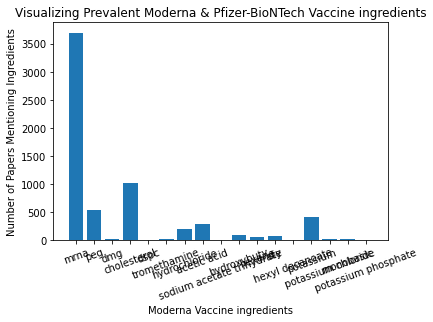

In [10]:
moderna_Pfizer_ingredient = ['mrna', 'peg', 'dmg', 'cholesterol', 'dspc', 
                             'tromethamine', 'hydrochloride', 'acetic acid', 'sodium acetate trihydrate',
                             'hydroxybuty', 'hexane', 'diy', 'hexyl decanoate',  
                             'potassium', 'potassium chloride','monobasic', 'potassium phosphate']

moderna_Pfizer_ingredient_count = count_words(moderna_Pfizer_ingredient)
print(moderna_Pfizer_ingredient_count)

plt.bar(moderna_Pfizer_ingredient_count.keys(),moderna_Pfizer_ingredient_count.values())

plt.xticks(rotation=20)
plt.title('Visualizing Prevalent Moderna & Pfizer-BioNTech Vaccine ingredients')
plt.xlabel('Moderna Vaccine ingredients')
plt.ylabel('Number of Papers Mentioning Ingredients')
plt.show()

{'recombinant': 4424, 'adenovirus': 2338, 'sars cov': 63822, 'citric acid monohydrate': 0, 'ethanol': 816, 'hbcd': 2, 'polysorbate': 16}


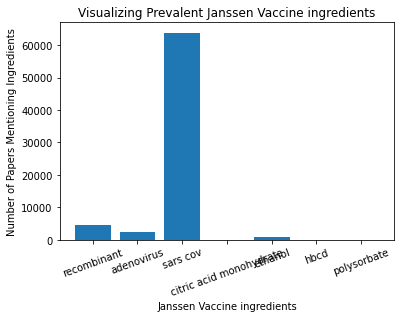

In [11]:
Janssen_ingredient = ['recombinant', 'adenovirus','sars cov','citric acid monohydrate',
                      'ethanol', 'hbcd', 'polysorbate']

Janssen_ingredient_count = count_words(Janssen_ingredient)
print(Janssen_ingredient_count)

plt.bar(Janssen_ingredient_count.keys(),Janssen_ingredient_count.values())
plt.xticks(rotation=20)
 
plt.title('Visualizing Prevalent Janssen Vaccine ingredients')
plt.xlabel('Janssen Vaccine ingredients')
plt.ylabel('Number of Papers Mentioning Ingredients')
plt.show()

In [12]:
# Add feature 'relate_vaccine': indicate relative vaccine related to the paper

df_raw['relate_vaccine'] = np.nan

for i in range(df_raw.shape[0]):
    text = df_raw['abstract'].iloc[i]
    
    if any(word in text for word in moderna_Pfizer_ingredient):
        df_raw['relate_vaccine'].iloc[i] = 'moderna & Pfizer'
    
    elif any(word in text for word in Janssen_ingredient):
        df_raw['relate_vaccine'].iloc[i] = 'Janssen' 

    else:
         df_raw['relate_vaccine'].iloc[i] = 'other'

df_raw.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,title,abstract,authors,publish_year,relate_vaccine
0,Clinical features of culture-proven Mycoplasma...,objective retrospective chart review describes...,"Madani, Tariq A; Al-Ghamdi, Aisha A",2001,other
1,Nitric oxide: a pro-inflammatory mediator in l...,inflammatory disease respiratory tract commonl...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",2000,other
2,Surfactant protein-D and pulmonary host defense,surfactant protein sp participates innate resp...,"Crouch, Erika C",2000,other
3,Role of endothelin-1 in lung disease,endothelin et 21 amino acid peptide diverse bi...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",2001,other
4,Gene expression in epithelial cells in respons...,respiratory syncytial virus rsv pneumonia viru...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",2001,other


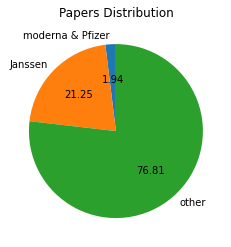

In [13]:
# seperate df_raw into 3 sub dataframe according to their relate_vaccine

df_moderna_Pfizer = df_raw[df_raw['relate_vaccine'] == 'moderna & Pfizer']  
df_Janssen = df_raw[df_raw['relate_vaccine'] == 'Janssen']
df_other = df_raw[df_raw['relate_vaccine'] == 'other']

labels = ['moderna & Pfizer', 'Janssen', 'other'] 
sizes = [len(df_moderna_Pfizer),len(df_Janssen),len(df_other)]
 
plt.pie(sizes, labels=labels, autopct='%1.2f', startangle=90)
plt.title('Papers Distribution')
plt.show()

In [14]:
def plt_wordcloud (df,col):
    # visualize the word frequency, the larger the word, more frequent the word appears in text.
    words_list = ''
    for text in df[col]: 
        words = text.split() 
        words_list += " ".join(words) 
    
    plt.figure(figsize = (10, 5))
    cloud=WordCloud(width = 1200, height = 600, collocations=False, background_color='white',).generate(words_list)
    
    plt.imshow(cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show() 

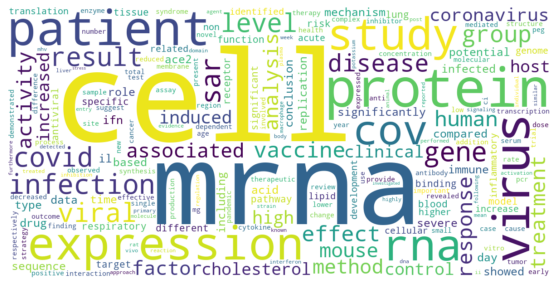

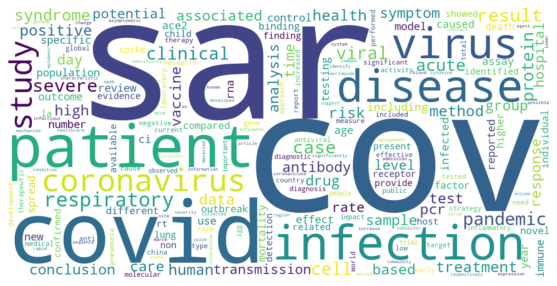

In [15]:
# Visualize word frequency 
plt_wordcloud (df_moderna_Pfizer,'abstract') 
plt_wordcloud (df_Janssen,'abstract')

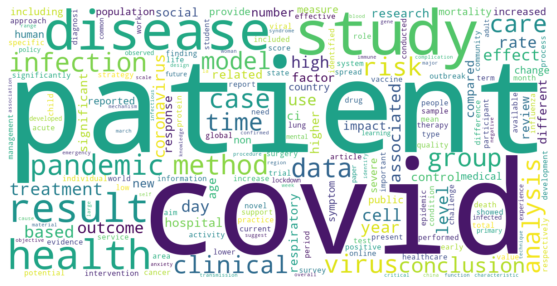

In [16]:
plt_wordcloud (df_other,'abstract') 

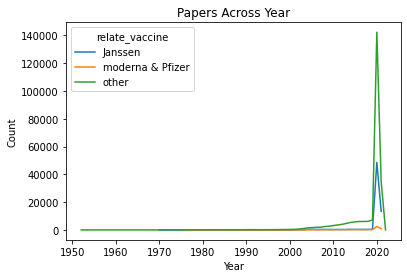

In [17]:
year_df = df_raw.groupby(['publish_year','relate_vaccine'])['relate_vaccine'].count().unstack()
# year_df = year_df.T.apply(lambda x : x/x.sum()).T
year_df.plot(legend=True)

plt.title('Papers Across Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [18]:
# Standardize 'publish_year' 
min_max_scaler = preprocessing.MinMaxScaler()
df_raw.publish_year = min_max_scaler.fit_transform(df_raw.publish_year.values.reshape(-1,1))

df_raw.head()

,title,abstract,authors,publish_year,relate_vaccine
0,Clinical features of culture-proven Mycoplasma...,objective retrospective chart review describes...,"Madani, Tariq A; Al-Ghamdi, Aisha A",0.700000,other
1,Nitric oxide: a pro-inflammatory mediator in l...,inflammatory disease respiratory tract commonl...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",0.685714,other
2,Surfactant protein-D and pulmonary host defense,surfactant protein sp participates innate resp...,"Crouch, Erika C",0.685714,other
3,Role of endothelin-1 in lung disease,endothelin et 21 amino acid peptide diverse bi...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",0.700000,other
4,Gene expression in epithelial cells in respons...,respiratory syncytial virus rsv pneumonia viru...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",0.700000,other


# 3. Model selection and fitting to data – [12 marks] 
Select a machine learning model of your choice (you may select an unsupervised or supervised machine learning model depending on your approach) that will allow you to study some aspect of COVID-19 from the corpus of research articles. You must justify your algorithm choices and the approach you will use to fit your model using the dataset provided. You may also choose to study multiple models and report on the suitability of each in addressing your overarching question regarding COVID-19. You should also use the dataset provided to train the models selected and discuss and interpret the findings of these models. You may also use this section to improve the model depending on the findings of your models and how you interpret them.

In [19]:
clean_df = df_raw.copy()
clean_df

,title,abstract,authors,publish_year,relate_vaccine
0,Clinical features of culture-proven Mycoplasma...,objective retrospective chart review describes...,"Madani, Tariq A; Al-Ghamdi, Aisha A",0.700000,other
1,Nitric oxide: a pro-inflammatory mediator in l...,inflammatory disease respiratory tract commonl...,"Vliet, Albert van der; Eiserich, Jason P; Cros...",0.685714,other
2,Surfactant protein-D and pulmonary host defense,surfactant protein sp participates innate resp...,"Crouch, Erika C",0.685714,other
3,Role of endothelin-1 in lung disease,endothelin et 21 amino acid peptide diverse bi...,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",0.700000,other
4,Gene expression in epithelial cells in respons...,respiratory syncytial virus rsv pneumonia viru...,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",0.700000,other
...,...,...,...,...,...
497899,Subclinical ocular inflammation in persons rec...,coronavirus disease 2019 covid 19 characterize...,"Bakhoum, M. F.; Ritter, M.; Garg, A.; Chan, A....",0.971429,other
497900,Can COVID-19 strike twice?,study suggests primary sars cov exposure prote...,"York, Ashley",0.971429,Janssen
497903,Probable Longer Incubation Period for Elderly ...,background factor associated incubation period...,"Dai, Jingyi; Yang, Lin; Zhao, Jun",0.971429,Janssen
497904,A comprehensive survey of AI-enabled phishing ...,recent time phishing attack prominent attack f...,"Basit, Abdul; Zafar, Maham; Liu, Xuan; Javed, ...",0.971429,other


In [20]:
# Comment
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# clean_path = "/content/drive/MyDrive/Colab Notebooks/2020 WINTER/clean_dataframe"
# clean_df = pd.read_csv(clean_path)
# clean_df

In [21]:
# There are 19 papers not in English, drop them
# unenglish_paper_index = [19384,  21975,  26729,  32272,  38183,  44994,  55621, 130296, 143789, 164745, 174932, 194191, 210314, 231863, 237632, 250930,
#                         262634, 281719, 301677]
# clean_df = clean_df.drop(index=unenglish_paper_index)


In [22]:
def prepare_data (X, y, vectorizer, max_feature):
  """
  Split the data into 70% training and 30% test data, 
  then apply word frequency or tfidf onto the clean text
  """
  # Split data randomly into training data (70%) and test data(30%)
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=66)

  X_train = X_train.reset_index(drop=True) 
  X_test = X_test.reset_index(drop=True) 

  if vectorizer == 'wf':
    vec = CountVectorizer(stop_words='english', max_features = max_feature)

  elif vectorizer == 'tfidf':
    vec = TfidfVectorizer(stop_words='english', max_features = max_feature)

  features_train = vec.fit_transform(X_train['abstract']) 
  features_test = vec.transform(X_test['abstract']) 

  features_train = pd.DataFrame.sparse.from_spmatrix(features_train)
  features_test  = pd.DataFrame.sparse.from_spmatrix(features_test)
  
  X_train = pd.concat([X_train.publish_year, features_train], axis=1)
  X_test = pd.concat([X_test.publish_year, features_test], axis=1)
 
  return X_train, X_test, y_train, y_test

In [23]:
# Value and Target
X = clean_df.drop(columns=['title','authors','relate_vaccine'])
y = clean_df['relate_vaccine']

In [24]:
# X_train_wf, X_test_wf, y_train, y_test = prepare_data (X, y, vectorizer='wf', max_feature=1500)
X_train_tfidf, X_test_tfidf, y_train, y_test = prepare_data (X, y, vectorizer='tfidf', max_feature=1500)

Logistic Regression

In [25]:
C = [0.001, 0.01, 0.1, 1, 10 ]
Train_recall = []
Test_recall = []

In [26]:
# C=0.001
lr = LogisticRegression(C=C[0], penalty='l1', solver='saga', multi_class='multinomial', random_state=66)
lr.fit(X_train_tfidf, y_train)

# predict on train and test set
y_train_predict = lr.predict(X_train_tfidf)
y_test_predict = lr.predict(X_test_tfidf)

# calculate train and test recall
Train_recall.append(recall_score(y_train, y_train_predict, average='macro'))
Test_recall.append(recall_score(y_test, y_test_predict,average='macro'))

In [27]:
# C=0.01
lr = LogisticRegression(C=C[1], penalty='l1', solver='saga', multi_class='multinomial', random_state=66)
lr.fit(X_train_tfidf, y_train)

# predict on train and test set
y_train_predict = lr.predict(X_train_tfidf)
y_test_predict = lr.predict(X_test_tfidf)

# calculate train and test recall
Train_recall.append(recall_score(y_train, y_train_predict, average='macro'))
Test_recall.append(recall_score(y_test, y_test_predict,average='macro'))
 

In [28]:
# C=0.1
lr = LogisticRegression(C=C[2], penalty='l1', solver='saga', multi_class='multinomial', random_state=66)
lr.fit(X_train_tfidf, y_train)
# predict on train and test set
y_train_predict = lr.predict(X_train_tfidf)
y_test_predict = lr.predict(X_test_tfidf)

# calculate train and test recall
Train_recall.append(recall_score(y_train, y_train_predict, average='macro'))
Test_recall.append(recall_score(y_test, y_test_predict,average='macro'))
 

In [29]:
# C=1
lr = LogisticRegression(C=C[3], penalty='l1', solver='saga', multi_class='multinomial', random_state=66)
lr.fit(X_train_tfidf, y_train)
# predict on train and test set
y_train_predict = lr.predict(X_train_tfidf)
y_test_predict = lr.predict(X_test_tfidf)

# calculate train and test recall
Train_recall.append(recall_score(y_train, y_train_predict, average='macro'))
Test_recall.append(recall_score(y_test, y_test_predict,average='macro'))
  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [30]:
 # C=10
lr = LogisticRegression(C=C[4], penalty='l1', solver='saga', multi_class='multinomial', random_state=66)
lr.fit(X_train_tfidf, y_train)
# predict on train and test set
y_train_predict = lr.predict(X_train_tfidf)
y_test_predict = lr.predict(X_test_tfidf)

# calculate train and test recall
Train_recall.append(recall_score(y_train, y_train_predict, average='macro'))
Test_recall.append(recall_score(y_test, y_test_predict,average='macro'))
 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [31]:
result_table = {'C  ': C,
                'Train recall  ': Train_recall,
                'Test recall ': Test_recall}
pd.DataFrame (result_table)

,C,Train recall,Test recall
0,0.001,0.515923,0.513618
1,0.010,0.732977,0.730845
2,0.100,0.835318,0.827293
3,1.000,0.846329,0.836466
4,10.000,0.851323,0.840387


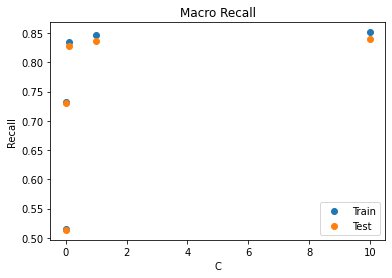

In [32]:
plt.scatter(C, Train_recall, label='Train')
plt.scatter(C, Test_recall, label='Test')
plt.xlabel('C')
plt.ylabel('Recall')
plt.title('Macro Recall')
plt.legend()
plt.show()

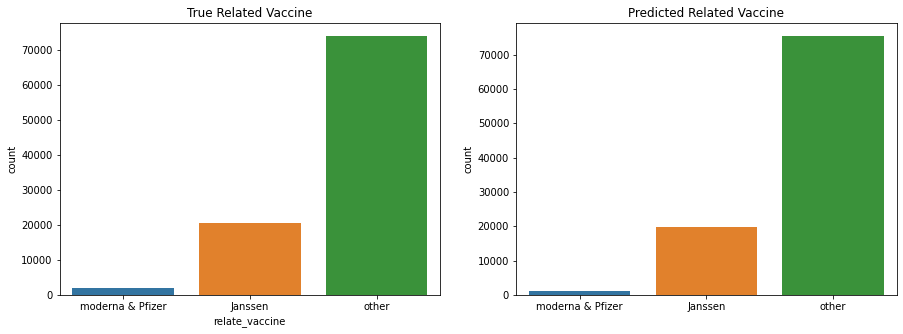

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(ax=axes[0],x = y_test, order=labels)
axes[0].set_title('True Related Vaccine')
 
sns.countplot(ax=axes[1],x = lr.predict(X_test_tfidf),order=labels)
axes[1].set_title('Predicted Related Vaccine') 

plt.show()

# 4. Deriving insights about policy and guidance to tackle the outbreak based on model findings – [7 marks] 
Using the findings from your NLP model and text mining 400,000 unique biomedical research papers on the coronavirus you are now tasked with discussing and proposing how scientists, doctors, nurses, healthcare professionals, industry and governments can best use the insights from your data science model to assist in the fight against the COVID-19 pandemic. Use the insights derived about the disease from your model and your data analysis to justify proposed policies or action items.

Apply classification model allows scientists to access useful information related to vaccine more efficient. And they can research for the vaccine development, side affects and storage conditions through accessing those vaccine relative papers. 

Scientists:
1.   Develop more effective vaccines
2.   Study the vaccine side affects and allergic reactions 
3.   Find appropriate environment to safely store vaccine 
 
Doctors:
1.   Develop more effective therapy for patients
2.   Cooperate with scientists and provide real life experience  

Nurses and Healthcare professionals
1.   Ask medication allergy before covid vaccine
2.   Inform the side effects of covid vaccine

Industry 
1.   Restrict the store hours and number of customers in store
2.   Promote online shopping and pick up service  

Governments (could implement following policy):
1.   Arrange people to take vaccines based on age, job and risk
2.   Encourage people to wear mask and keep social distance 
3.   Forbidden non essential social gathering  
